In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
df=pd.read_csv("iris.data")
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
x=df.drop("class",axis=1)
y=df["class"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
model.fit(x_train,y_train);
y_pred=model.predict(x_test)
arr=np.array([y_pred,y_test])
df1=pd.DataFrame(arr.T,columns=["y_pred","y_test"])
df1

,y_pred,y_test
0,Iris-setosa,Iris-setosa
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-virginica,Iris-virginica
8,Iris-virginica,Iris-virginica
9,Iris-setosa,Iris-setosa


In [4]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_true=y_test,y_pred=y_pred)
acc

0.9666666666666667

# Check for missing values

In [15]:
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [24]:
y1=y
y1.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

# Peform Encoding on Categorical Values

In [45]:
df1=df

In [47]:
for column,content in df1.items():
    if(pd.api.types.is_string_dtype(content)):
        df1[column]=content.astype("category").cat.as_ordered()

In [53]:
for column,content in df1.items():
    if not (pd.api.types.is_numeric_dtype(content)):
        df1[column+"_is_missing"]=pd.isnull(content)
        df1[column]=pd.Categorical(content).codes+1

In [55]:
df1.drop("class_is_missing",axis=1,inplace=True)
df1

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,3
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,3


## Using Decision Tree
### 1.) Entropy

In [88]:
np.random.seed(2)
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree=DecisionTreeClassifier(criterion='entropy')
tree.fit(x_train,y_train);
y_preds=tree.predict(x_test)
ent_acc=accuracy_score(y_pred=y_preds,y_true=y_test)
ent_acc

0.9333333333333333

[Text(0.4, 0.9, 'petal width <= 0.8\nentropy = 1.581\nsamples = 120\nvalue = [36, 42, 42]\nclass = Iris-versicolor'),
 Text(0.3, 0.7, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = Iris-setosa'),
 Text(0.5, 0.7, 'petal width <= 1.65\nentropy = 1.0\nsamples = 84\nvalue = [0, 42, 42]\nclass = Iris-versicolor'),
 Text(0.2, 0.5, 'petal length <= 4.95\nentropy = 0.359\nsamples = 44\nvalue = [0, 41, 3]\nclass = Iris-versicolor'),
 Text(0.1, 0.3, 'entropy = 0.0\nsamples = 40\nvalue = [0, 40, 0]\nclass = Iris-versicolor'),
 Text(0.3, 0.3, 'petal width <= 1.55\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(0.4, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(0.8, 0.5, 'petal length <= 4.85\nentropy = 0.169\nsamples = 40\nvalue = [0, 1, 39]\nclass = Iris-virginica'),
 Text(0.7, 0.3, 'sepal width <= 3.1\nentropy = 0.811\nsamp

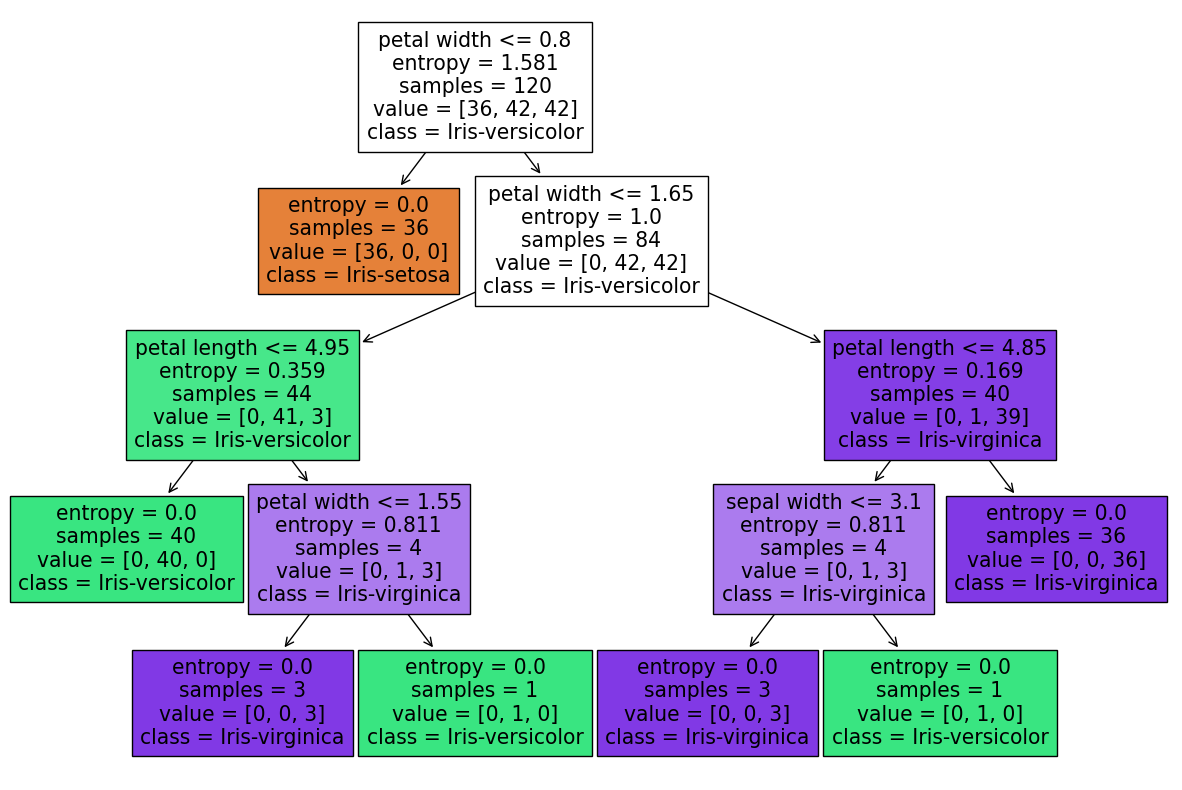

In [90]:
plt.figure(figsize=(15,10))
plot_tree(decision_tree=tree,feature_names=['sepal length','sepal width','petal length','petal width'],
          class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],max_depth=5,filled=True)

### 2.) CART

In [69]:
np.random.seed(2)
from sklearn.tree import DecisionTreeClassifier,plot_tree
cart=DecisionTreeClassifier(criterion='gini',max_depth=10)
cart.fit(x_train,y_train)
y_preds=cart.predict(x_test)
cart_acc=accuracy_score(y_pred=y_preds,y_true=y_test)
cart_acc

0.9333333333333333

<BarContainer object of 2 artists>

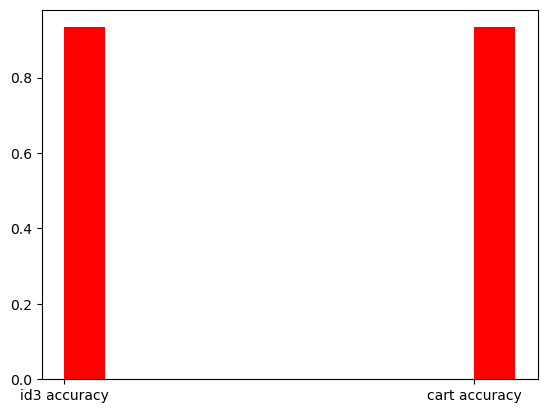

In [82]:
acc={"id3 accuracy":tree_acc,"cart accuracy":cart_acc}
tree=acc.keys()
acc=acc.values()
plt.bar(tree,acc,color='red',width=0.1,align='edge')